## Step 1 - Importing Necessary Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## Step 2 - Importing Necessary files


In [5]:
path_to_fluprint = r"C:\Users\Dana\OneDrive\Documents\Applied Data science\FluPRINT_database\FluPRINT_filtered_data\pivoted_data_stand.csv"
fluprint_data = pd.read_csv(path_to_fluprint)

## Step 3 - K-means Clustering

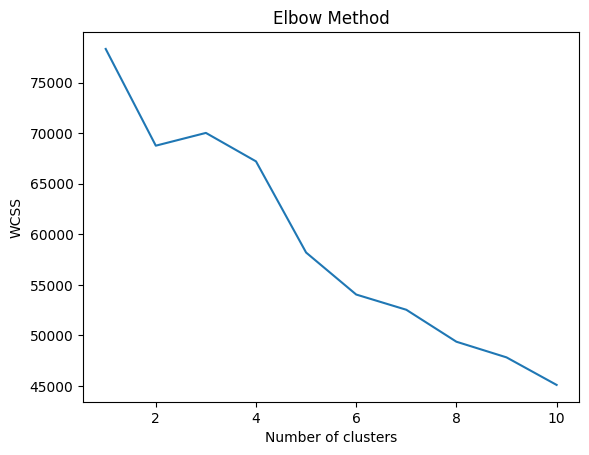

Cluster  vaccine_response
0        0.0                 0.836735
         1.0                 0.163265
1        0.0                 0.645161
         1.0                 0.354839
2        0.0                 0.668269
         1.0                 0.331731
Name: proportion, dtype: float64


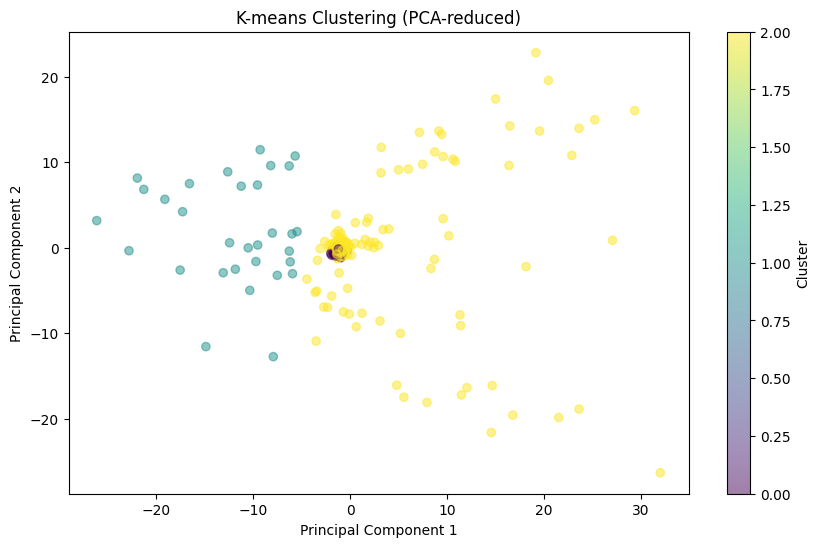

In [11]:
# Separate features from target (vaccine response)
X = fluprint_data.iloc[:, :-1]  # All columns except last
y = fluprint_data.iloc[:, -1]   # Vaccine response column

# Standardie features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal number of clusters using Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Perform K-means clustering
optimal_clusters = 3  # this was chosen at random
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add clusters to original data
fluprint_data['Cluster'] = clusters

# Compare clusters with vaccine response
cluster_analysis = fluprint_data.groupby('Cluster')['vaccine_response'].value_counts(normalize=True)
print(cluster_analysis)

# Visualise clusters (using PCA for dimensionality reduction)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

plt.figure(figsize=(10,6))
plt.scatter(principal_components[:,0], principal_components[:,1], 
            c=clusters, cmap='viridis', alpha=0.5)
plt.title('K-means Clustering (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

### Analysis of K-means Clustering Results (3 Clusters)

Based on the Elbow method, the optimal number of clusters appears to be around 3 or 4. We've analysed the results with 3 clusters, and we will now try it again with 4 to see what difference it makes.

#### Cluster Analysis

- **Cluster 0:** 83.7% low responders (0.0), 16.3% high responders (1.0)
- **Cluster 1:** 64.5% low responders (0.0), 35.5% high responders (1.0)
- **Cluster 2:** 66.8% low responders (0.0), 33.2% high responders (1.0)

**Interpretation:**

Cluster 0 is heavily skewed towards low vaccine responders, with over 83% in that group. This suggests this cluster captures a specific immune profile associated with poor vaccine response.

Clusters 1 and 2 have a more balanced mix but still skew towards low responders (64.5% and 66.8%, respectively). They may represent intermediate or mixed immune profiles.

**PCA Plot Interpretation:**

Based on the PCA plot, we can infer:

- One cluster is well-separated from the others, dominated by low responders (likely Cluster 0).
- Two clusters are closer together, with mixed responders, and potentially more difficult to separate (likely Clusters 1 and 2).

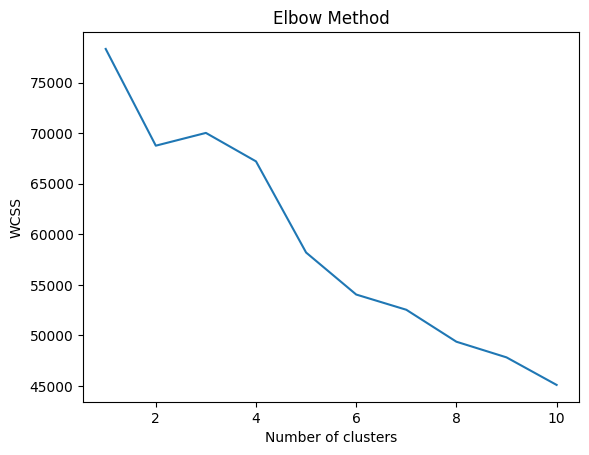

Cluster  vaccine_response
0        0.0                 0.785714
         1.0                 0.214286
1        0.0                 0.800000
         1.0                 0.200000
2        0.0                 0.648402
         1.0                 0.351598
3        0.0                 1.000000
Name: proportion, dtype: float64


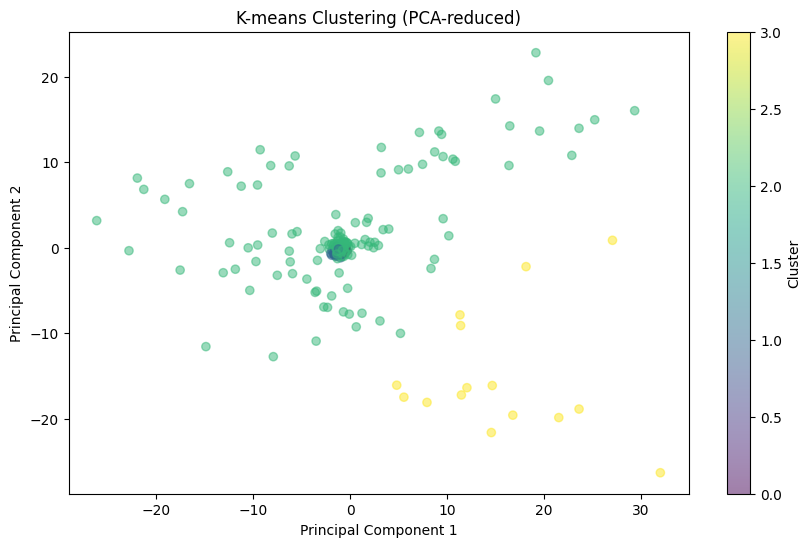

In [12]:
# Separate features from target (vaccine response)
X = fluprint_data.iloc[:, :-1]  # All columns except last
y = fluprint_data.iloc[:, -1]   # Vaccine response column

# Standardie features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal number of clusters using Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Perform K-means clustering
optimal_clusters = 4  # try 4 this time
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add clusters to original data
fluprint_data['Cluster'] = clusters

# Compare clusters with vaccine response
cluster_analysis = fluprint_data.groupby('Cluster')['vaccine_response'].value_counts(normalize=True)
print(cluster_analysis)

# Visualise clusters (using PCA for dimensionality reduction)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

plt.figure(figsize=(10,6))
plt.scatter(principal_components[:,0], principal_components[:,1], 
            c=clusters, cmap='viridis', alpha=0.5)
plt.title('K-means Clustering (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

### Analysis of K-means Clustering Results (4 Clusters)

#### Cluster Analysis

- **Cluster 0:** 78.57% low responders (0.0), 21.43% high responders (1.0)
- **Cluster 1:** 80.00% low responders (0.0), 20.00% high responders (1.0)
- **Cluster 2:** 64.84% low responders (0.0), 35.16% high responders (1.0)
- **Cluster 3:** 100.00% low responders (0.0), 0.00% high responders (1.0)

#### Interpretation

- **Cluster 3: Pure Low Responders:** This cluster consists entirely of low vaccine responders, indicating it likely captures a distinct immune profile strongly associated with poor response.
- **Clusters 0 and 1: Skewed Towards Low Responders:** These clusters still have a majority of low responders (78.57% and 80%, respectively), suggesting they capture similar immune profiles but with slightly different characteristics than Cluster 3.
- **Cluster 2: Mixed Responders:** This cluster has the most balanced mix of low and high responders (64.84% and 35.16%, respectively), potentially representing an intermediate immune profile.

#### PCA Plot Interpretation

Based on the PCA plot:

- Cluster 3 (likely the dark blue cluster) is relatively well-separated from the others, indicating a distinct immune profile with exclusively low responders.
- Clusters 0 and 1 (likely the green clusters) are closer together, showing some overlap and shared characteristics, with mostly low responders.
- Cluster 2 (likely the yellow cluster) is more distinct, with a mixed distribution of low and high responders, but closer to clusters 0 and 1.

In [18]:
fluprint_data['Cluster'] = clusters

# Calculate mean values for each feature in each cluster
cluster_means = fluprint_data.groupby('Cluster').mean()

# Calculate overall mean for comparison
overall_mean = fluprint_data.mean()

# Find features that are significantly different in each cluster
significant_features = {}
for cluster in cluster_means.index:
    # Calculate percent difference from overall mean
    percent_diff = (cluster_means.loc[cluster] - overall_mean) / overall_mean * 100
    
    # Find features that are more than 20% different from the overall mean
    sig_features = percent_diff[abs(percent_diff) > 20].sort_values(ascending=False)
    significant_features[cluster] = sig_features

# Print significant features for each cluster
for cluster, features in significant_features.items():
    print(f"\nCluster {cluster} significant features:")
    print(features)


Cluster 0 significant features:
Th17_non_neg_TFH_CD4_pos_T_cells_% of Parent      231.927721
plasmablasts_% of Parent                          178.063953
transitional_B_cells_% of Parent                  176.897369
Th17_TFH_CD4_pos_T_cells_% of Parent              166.374849
CD16_pos_CD14_neg_monocytes_% of Parent           164.878544
pDCs_% of Parent                                  101.579722
CD161_neg_CD45RA_pos_Tregs_% of Parent             81.924981
CD16_pos_monocytes_% of Parent                     76.218181
Th17_non_neg_TFH_CD8_pos_T_cells_% of Parent       73.277363
naive_CD4_pos_T_cells_% of Parent                  61.604775
CD16_pos_CD14_pos_monocytes_% of Parent            52.671341
IgD_pos_CD27_pos_B_cells_% of Parent               49.823913
ICOS_pos_CD4_pos_T_cell_% of Parent                49.458086
CD16_neg_CD56bright_NK_cells_% of Parent           46.643368
TFH_CD4_pos_T_cells_% of Parent                    44.461109
naive_CD8_pos_T_cells_% of Parent                  4

#### Cluster 0
- **Significant Features:**
  - Higher levels of Th17 cells, plasmablasts, and transitional B cells.
  - Lower levels of effector CD4+ T cells, gamma delta T cells, and Th17 TFH CD8+ T cells.

#### Cluster 1
- **Significant Features:**
  - Higher levels of CD16+ monocytes and pDCs.
  - Lower levels of naive T cells, Tregs, and some TFH subsets.

#### Cluster 2
- **Significant Features:**
  - Fewer significant differences, mainly in CD94+ CD4 T cells and some activated T cell subsets.

#### Cluster 3
- **Significant Features:**
  - High levels of activated (HLADR+ CD38+) T cells, both CD4+ and CD8+.
  - Lower levels of CD161+ Tregs and CD85j+ T cells.

### Interpretation
- **Cluster 3** is particularly notable for its association with low vaccine response, characterised by high levels of activated T cells.
- **Clusters 0 and 1** also show lower vaccine responses but with different immune profiles.
- The analysis helps identify specific immune cell types that may predict vaccine responsiveness.
